In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f8 = pd.read_csv('at_cluster_ms (8).txt', sep=' ', header=0)
f16 = pd.read_csv('at_cluster_ms (16).txt', sep=' ', header=0)
f32 = pd.read_csv('at_cluster_ms (32).txt', sep=' ', header=0)
f64 = pd.read_csv('at_cluster_ms (64).txt', sep=' ', header=0)
f128 = pd.read_csv('at_cluster_ms (128).txt', sep=' ', header=0)
g8 = pd.read_csv('at_met_ms (8).txt', sep=' ', header=0)
g16 = pd.read_csv('at_met_ms (16).txt', sep=' ', header=0)
g32 = pd.read_csv('at_met_ms (32).txt', sep=' ', header=0)
g64 = pd.read_csv('at_met_ms (64).txt', sep=' ', header=0)
g128 = pd.read_csv('at_met_ms (128).txt', sep=' ', header=0)

In [3]:
c_trial=int(len(f8.magsus)/50000)
m_trial=int(len(g8.magsus)/250000)
print(c_trial, m_trial)

20 20


In [5]:
start1=0
m_c_8=np.zeros((c_trial,50000-start1))
m_c_16=np.zeros((c_trial,50000-start1))
m_c_32=np.zeros((c_trial,50000-start1))
m_c_64=np.zeros((c_trial,50000-start1))
m_c_128=np.zeros((c_trial,50000-start1))
for i in range (c_trial):
    m_c_8[i]=np.array(f8.magsus[start1+50000*i:50000+50000*i])
    m_c_16[i]=np.array(f16.magsus[start1+50000*i:50000+50000*i])
    m_c_32[i]=np.array(f32.magsus[start1+50000*i:50000+50000*i])
    m_c_64[i]=np.array(f64.magsus[start1+50000*i:50000+50000*i])
    m_c_128[i]=np.array(f128.magsus[start1+50000*i:50000+50000*i])

In [6]:
start2=0
m_m_8=np.zeros((m_trial,250000-start2))
m_m_16=np.zeros((m_trial,250000-start2))
m_m_32=np.zeros((m_trial,250000-start2))
m_m_64=np.zeros((m_trial,250000-start2))
m_m_128=np.zeros((m_trial,250000-start2))
for i in range (m_trial):
    m_m_8[i]=np.array(g8.magsus[start2+250000*i:250000+250000*i])
    m_m_16[i]=np.array(g16.magsus[start2+250000*i:250000+250000*i])
    m_m_32[i]=np.array(g32.magsus[start2+250000*i:250000+250000*i])
    m_m_64[i]=np.array(g64.magsus[start2+250000*i:250000+250000*i])
    m_m_128[i]=np.array(g128.magsus[start2+250000*i:250000+250000*i])

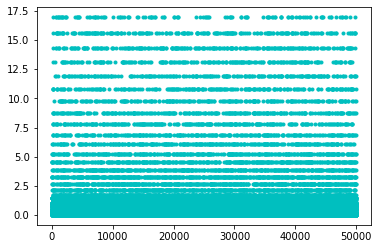

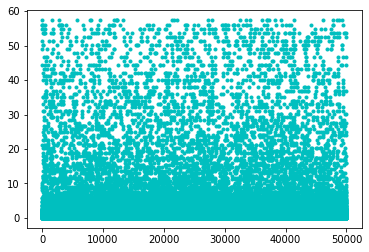

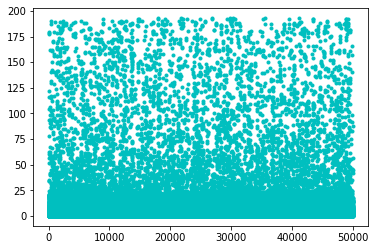

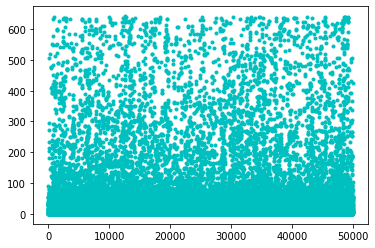

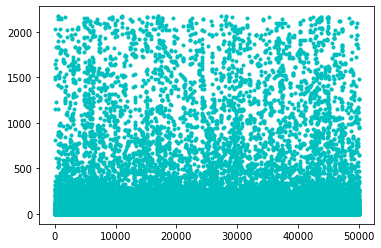

In [7]:
t=np.arange(len(m_c_8[0]))
ith=3
plt.plot(t, m_c_8[ith], 'c.')
plt.show()
plt.plot(t, m_c_16[ith], 'c.')
plt.show()
plt.plot(t, m_c_32[ith], 'c.')
plt.show()
plt.plot(t, m_c_64[ith], 'c.')
plt.show()
plt.plot(t, m_c_128[ith], 'c.')
plt.show()

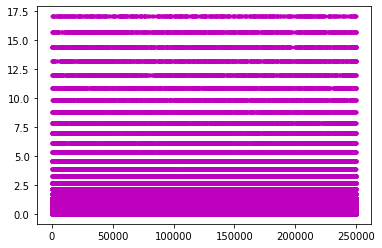

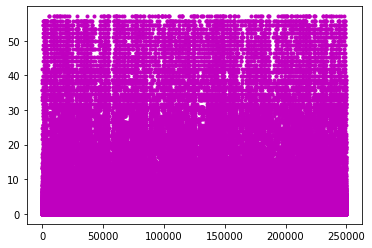

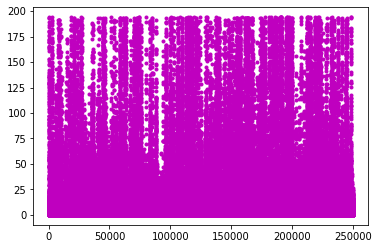

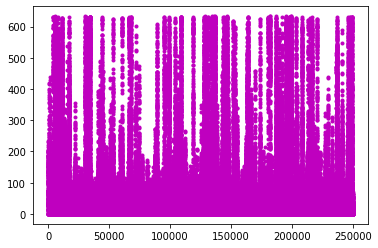

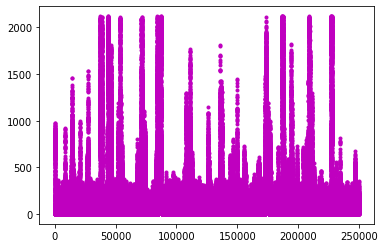

In [8]:
t2=np.arange(len(m_m_8[0]))
plt.plot(t2, m_m_8[ith], 'm.')
plt.show()
plt.plot(t2, m_m_16[ith], 'm.')
plt.show()
plt.plot(t2, m_m_32[ith], 'm.')
plt.show()
plt.plot(t2, m_m_64[ith], 'm.')
plt.show()
plt.plot(t2, m_m_128[ith], 'm.')
plt.show()

In [9]:
def old_attime(yy, n):
    c_0=np.var(yy)
    inside=0
    for i in range(1, n):
        iinside =0
        for j in range (1, n-i):
            iinside = iinside + (yy[i]-np.mean(yy))*(yy[i+j]-np.mean(yy))
        inside = inside + 1/(n-i) * iinside
    return 1+2*inside/c_0

def next_pow_2(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x):
    x = np.atleast_1d(x)
    nn = next_pow_2(len(x))
    f = np.fft.fft(x-np.mean(x), n=nn*2)
    acf = np.real(np.fft.ifft(f * np.conjugate(f))[:len(x)])/(4*nn)
    acf = acf / (len(x)-np.arange(len(x)))
    acf = acf/acf[0]
    return acf

def autocorr_time(yy):
    #c_0 = np.var(yy)
    A = autocorr_func_1d(yy)
    return -1+2*np.sum(A[:100])

def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(y)
    taus = -1+2*np.cumsum(f)
    window = auto_window(taus, c)
    return taus[window]

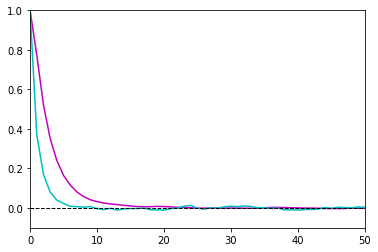

In [10]:
plt.plot(autocorr_func_1d(m_m_8[ith]), 'm-')
plt.plot(autocorr_func_1d(m_c_8[ith]), 'c-')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 50)
plt.show()

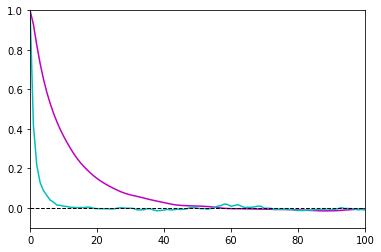

In [11]:
plt.plot(autocorr_func_1d(m_m_16[ith]), 'm-')
plt.plot(autocorr_func_1d(m_c_16[ith]), 'c-')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 100)
plt.show()

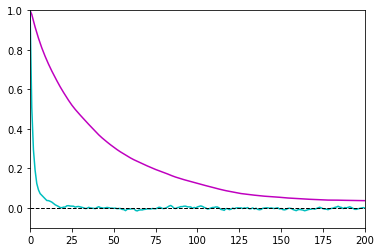

In [12]:
plt.plot(autocorr_func_1d(m_m_32[ith]), 'm-')
plt.plot(autocorr_func_1d(m_c_32[ith]), 'c-')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 200)
plt.show()

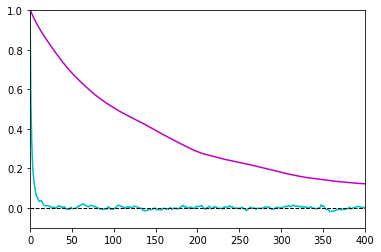

In [13]:
plt.plot(autocorr_func_1d(m_m_64[ith]), 'm-')
plt.plot(autocorr_func_1d(m_c_64[ith]), 'c-')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 400)
plt.show()

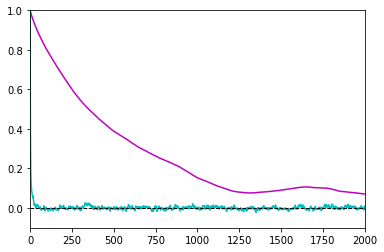

In [15]:
plt.plot(autocorr_func_1d(m_m_128[ith]), 'm-')
plt.plot(autocorr_func_1d(m_c_128[ith]), 'c-')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 2000)
plt.show()

/home/hyejin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


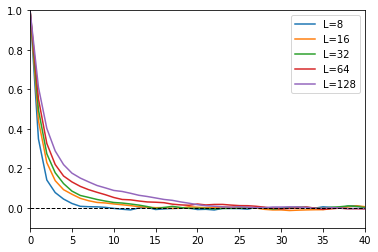

In [16]:
ith=19
plt.plot(autocorr_func_1d(m_c_8[ith]), label='L=8')
plt.plot(autocorr_func_1d(m_c_16[ith]), label='L=16')
plt.plot(autocorr_func_1d(m_c_32[ith]), label='L=32')
plt.plot(autocorr_func_1d(m_c_64[ith]), label='L=64')
plt.plot(autocorr_func_1d(m_c_128[ith]), label='L=128')
plt.legend()
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 40)
plt.show()

/home/hyejin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


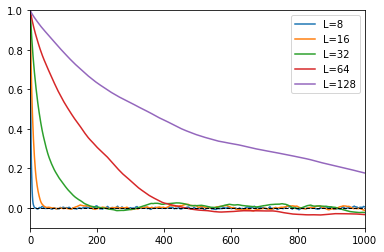

In [17]:
ith=19
plt.plot(autocorr_func_1d(m_m_8[ith]), label='L=8')
plt.plot(autocorr_func_1d(m_m_16[ith]), label='L=16')
plt.plot(autocorr_func_1d(m_m_32[ith]), label='L=32')
plt.plot(autocorr_func_1d(m_m_64[ith]), label='L=64')
plt.plot(autocorr_func_1d(m_m_128[ith]), label='L=128')
plt.legend()
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.ylim(-0.1, 1)
plt.xlim(0, 1000)
plt.show()